# Approach
<!-- Describe your approach to solving the problem. -->  
本题是切割问题，但切割问题类似组合问题！   
例如对于字符串abcdef：
组合问题：选取一个a之后，在bcdef中再去选取第二个，选取b之后在cdef中再选取第三个.....   
切割问题：切割一个a之后，在bcdef中再去切割第二段，切割b之后在cdef中再切割第三段.....   
注意组合问题是每一层只取一个元素，但是切割是取一段元素！！！      

切割问题也可以抽象为树形状结果！
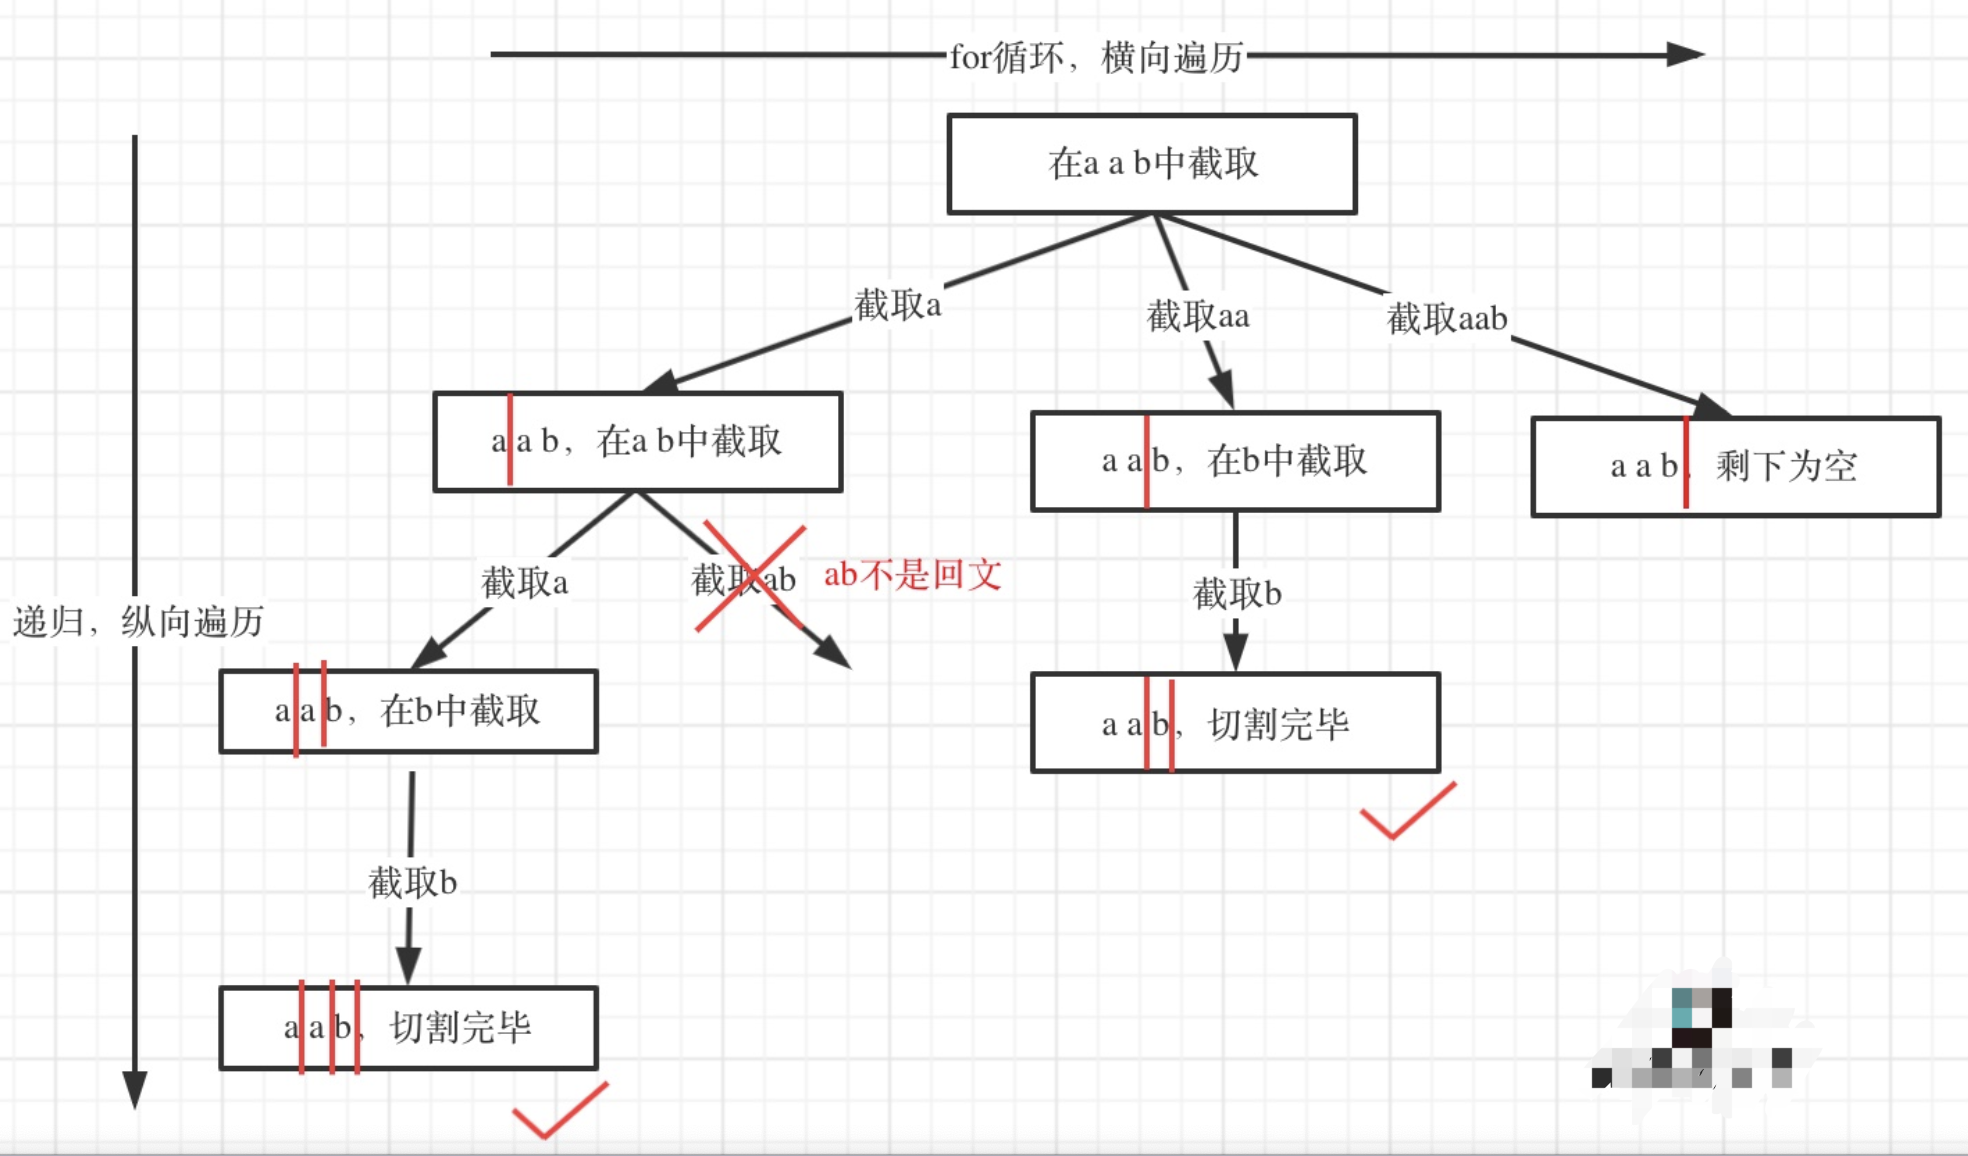
如图所示，当切割线（就是图中的红线）切割到字符串s的结尾位置，说明找到了一个切割方法！因此还可以用startIndex去表示每次切割的起始位置！然后for loop就是for i in range(startIndex, len(s))，这里的i不是之前组合问题中的要加入path中的元素的下标，在切割问题中，这表示切割的终止位置！即从下标为i的字符的右边切割！   
如果确定了要切割的字符的下标，我们就从该字符右边去切割！我们最后一次切割的时候切割的位置是len(s)-1，然后进入下一次递归此时startIndex=len(s)，我们没有字符去切割了！应该终止递归！   

# Note
回溯算法模板框架：
```
void backtracking(参数) {
    if (终止条件) {
        存放结果;
        return;
    }

    for (选择：本层集合中元素（树中节点孩子的数量就是集合的大小）) {
        处理节点;
        backtracking(路径，选择列表); // 递归
        回溯，撤销处理结果
    }
}
```

python slicing：s[start : stop : step]，从s[start]到s[stop - 1]按照step来取！

# Code

In [ ]:
class Solution:
    def partition(self, s: str) -> List[List[str]]:
        path = []
        result = []
        self.backtracking(s, 0, path, result)
        return result
    
    # 双指针判断回文序列
    def isP(self, s):
        start = 0
        end = len(s) - 1
        while (start < end):
            if s[start] != s[end]:
                return False
            start += 1
            end -= 1
        return True

    def backtracking(self, s, startIndex, path, result):
        # 最后一个切割的字符的下标是len(s)-1，然后进入下一个递归的时候startIndex就是len(s)，此时就可以把path放入结果中并终止递归
        # 因为没有字符可以去切割了！
        if startIndex == len(s):
            result.append(path[:])
            return
        
        # 之前的题目中i表示开始遍历的元素的位置，我们只需要把i加入path，
        # 但由于本题是切割问题，此时的i表示切割的终点位置，我们要把startIndex到i这段字符串都加进path！
        for i in range(startIndex, len(s)):
            # startIndex表示切割的起始位置，i表示切割的终点位置！
            # 如果确定s[startIndex]到s[i]的字符串是回文子串，那我们把这一段字符串加入path！
            if self.isP(s[startIndex : i + 1]):
                path.append(s[startIndex : i + 1])
                # 由于不能重复，我们从上一个回文子串的结尾字符的下一个字符开始继续判断！
                self.backtracking(s, i + 1, path, result)
                # 回溯，删除上次加入的字符串
                path.pop()

In [ ]:
# 利用python特性判断回文子串，不需要单独写一个函数去判断
class Solution:
    def partition(self, s: str) -> List[List[str]]:
        path = []
        result = []
        self.backtracking(s, 0, path, result)
        return result

    def backtracking(self, s, startIndex, path, result):
        if startIndex > len(s) - 1:
            result.append(path[:])
            return

        for i in range(startIndex, len(s)):
            # 判断回文字符串
            if s[startIndex : i + 1] == s[startIndex : i + 1][::-1]:
                path.append(s[startIndex : i + 1])
                self.backtracking(s, i + 1, path, result)
                path.pop()